In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv("/content/50_Startups (1).csv")

In [ ]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADMS    50 non-null     float64
 2   MKTS    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data1[data1.duplicated()].shape

(0, 5)

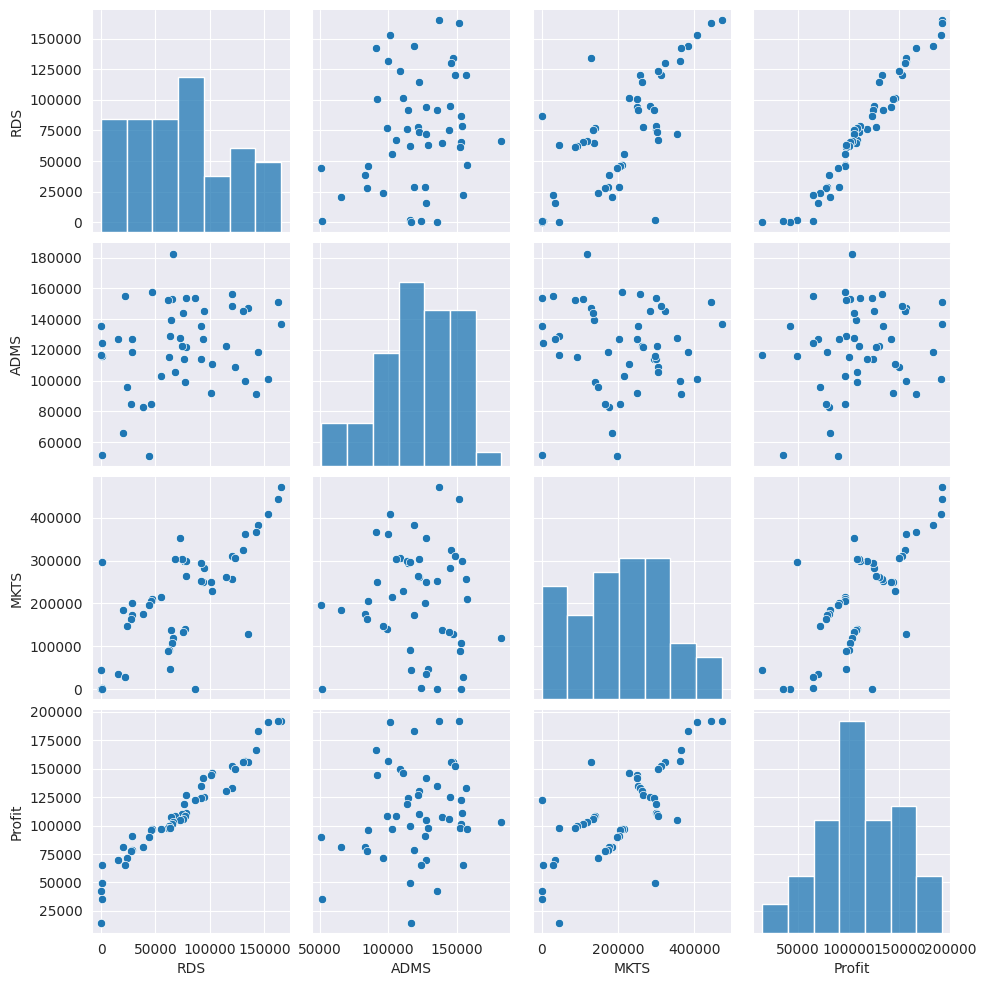

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()

In [ ]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

PREDICTION

In [ ]:
new_data=pd.DataFrame({'RDS':700123,"ADMS":900459,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,700123,900459,140000


In [ ]:
pred=model.predict(new_data)
pred

0    593887.079869
dtype: float64

In [ ]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'

In [ ]:
slr_a=smf.ols("Profit~ADMS",data=data1).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [ ]:
slr_m=smf.ols("Profit~MKTS",data=data1).fit()
slr_m.tvalues , slr_m.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [ ]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

MODEL VALIDATION

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x=data1.iloc[:,0:3]

In [ ]:
vif=pd.DataFrame()
vif['Features']=x.columns

In [ ]:
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
print(vif)

  Features       VIF
0      RDS  8.384571
1     ADMS  4.026406
2     MKTS  7.593984


CHECKING THE OUTLIERS

In [ ]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

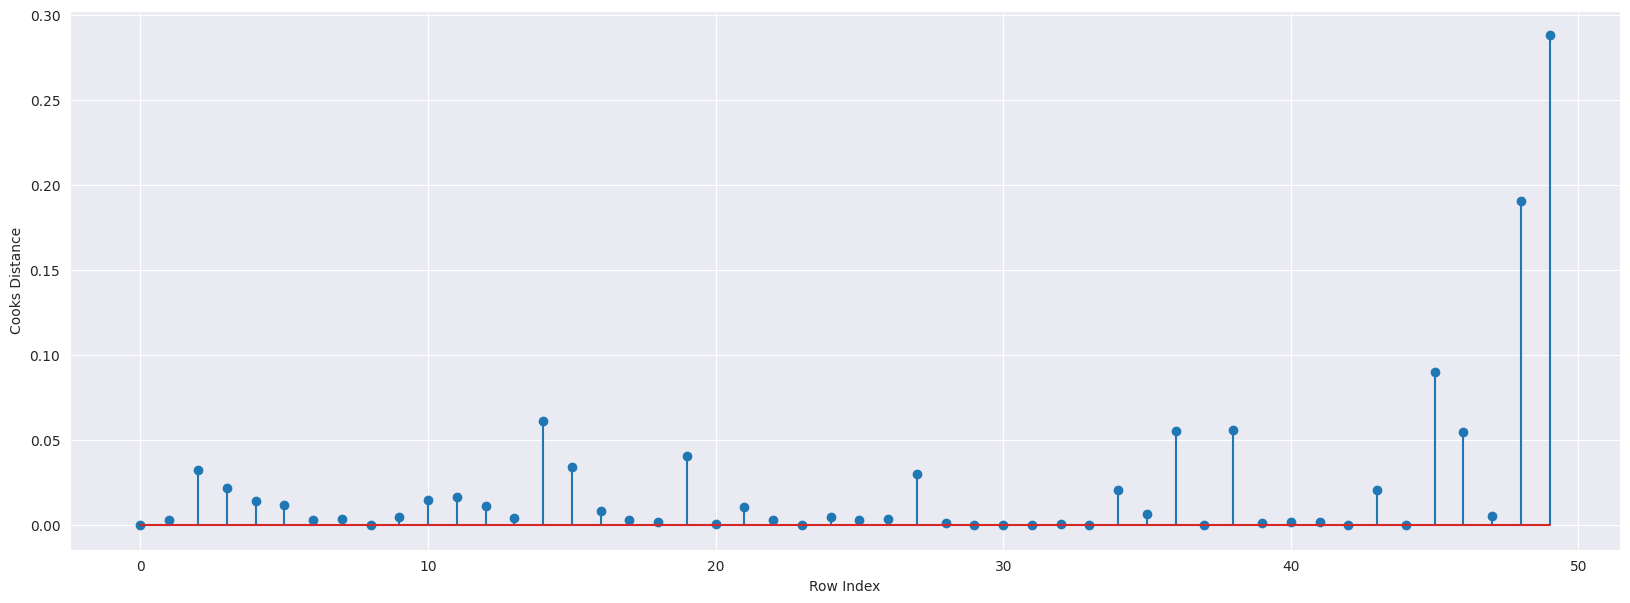

In [ ]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.argmax(c) , np.max(c)

(49, 0.2880822927543272)

IMPROVING THE MODEL

In [ ]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
model2=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()

In [ ]:
model2.params

Intercept    52382.439251
RDS              0.783002
ADMS            -0.022201
MKTS             0.025234
dtype: float64

In [ ]:
(model2.rsquared,model2.rsquared_adj)

(0.9613162435129847, 0.9587373264138503)

PREDICTION FOR MODEL 2

In [ ]:
new_data=pd.DataFrame({'RDS':700123,"ADMS":900459,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,700123,900459,140000


In [ ]:
pred=model.predict(new_data)
pred

0    593887.079869
dtype: float64

TABLE OF R2 FOR BOTH THE MODELS

In [ ]:
d2={'Prep_Models':['model','model2'],'Rsquared':[model.rsquared,model2.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,model,0.950746
1,model2,0.961316
